# This code is to analyse the CO and Ozone's monthly averaged data
### To run this code one needs to find the data from the following site


### More details of the data can be found in the Power point presentation attached
https://giovanni.gsfc.nasa.gov/giovanni/

In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import os
from glob import glob
from scipy.stats import linregress, spearmanr, pearsonr
from matplotlib.colors import LogNorm

## Here the data given is the monthly averaged concentration values in ppmv values

### There are 12 data points

In [3]:
# loading the folder with the whole year's data
path = glob("OZONE_DATA_PATH")[:-1] # folder location

# Defining the Carbon monoxide dataset 
co_path = glob("CO_DATA_PATH") #Folder with data

In [6]:
# defining function for a line
def line(x, m, c):
    return (m*x) + c

## Here the code generates the plots and prints the correlation coefficient

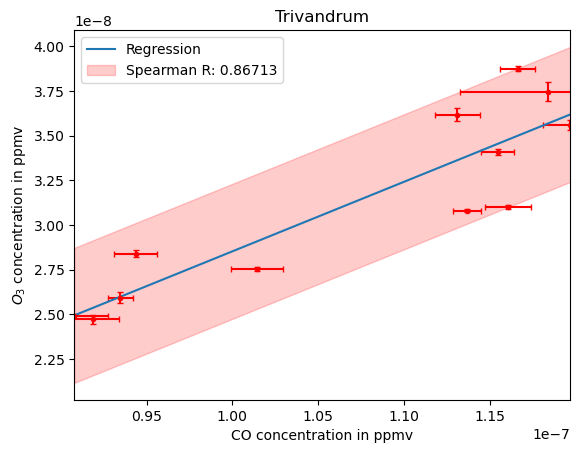

Spearman correlation coefficient is: 0.86713


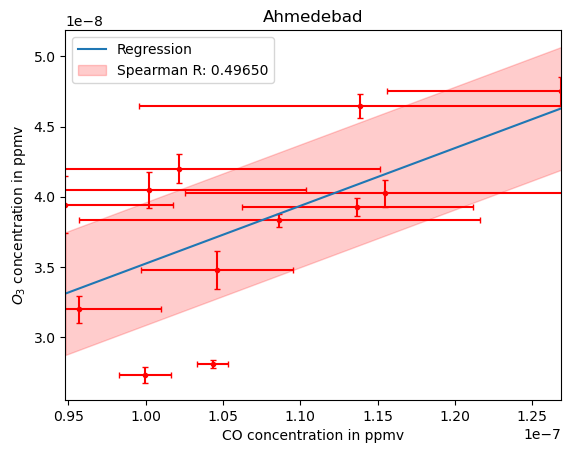

Spearman correlation coefficient is: 0.49650


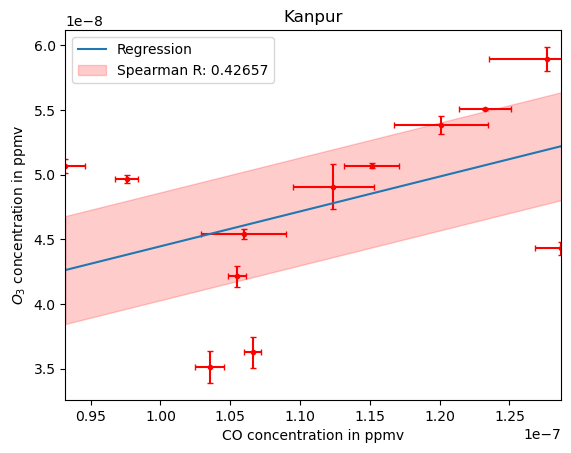

Spearman correlation coefficient is: 0.42657


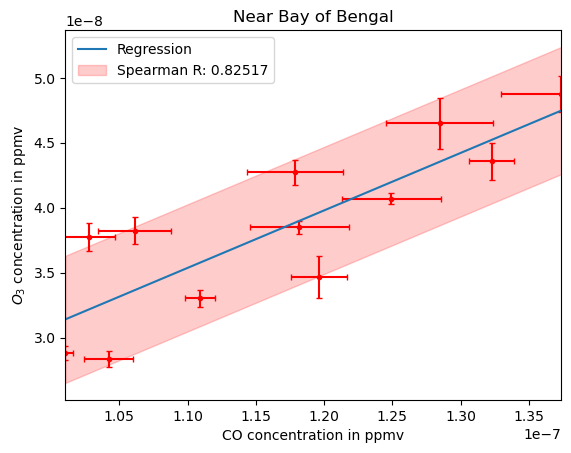

Spearman correlation coefficient is: 0.82517


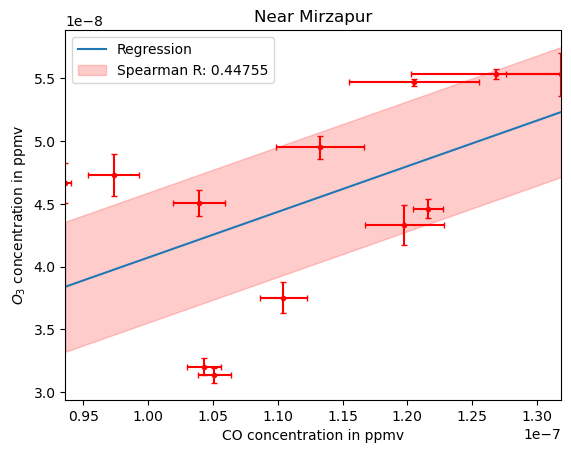

Spearman correlation coefficient is: 0.44755


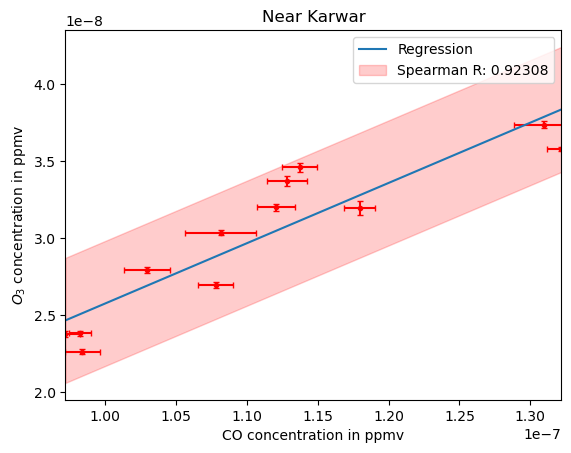

Spearman correlation coefficient is: 0.92308


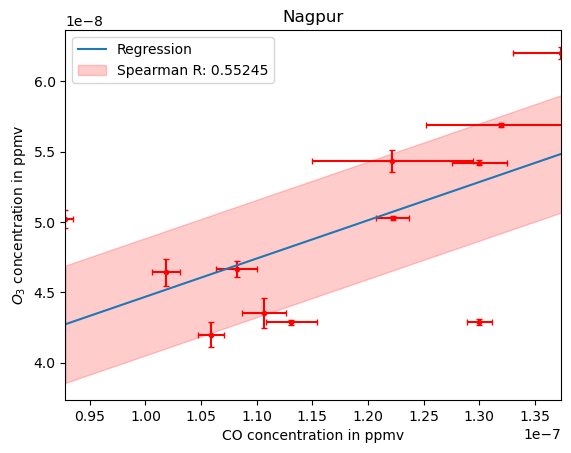

Spearman correlation coefficient is: 0.55245


In [8]:
# plt.style.use('seaborn-dark'):
# trying for a for loop
names = ["Trivandrum", "Ahmedebad", "Kanpur", "Near Bay of Bengal", "Near Mirzapur", "Near Karwar", "Nagpur"]
# here first number is longitude and second is latitude
coordinates = [[77, 9], [72, 20], [80, 26], [90, 21], [82, 24], [73, 14], [79, 29]]
for q in range(len(coordinates)):

    # Specify the target latitude and longitude
    target_latitude = coordinates[q][1]
    target_longitude = coordinates[q][0]
    
    pre_ind = 1 # pressure index
    
    o3 = []
    o3_err = []
    for i in path:
        ds = Dataset(i)

        # Extract the latitude, longitude, and ozone data from the dataset
        latitude_data = ds.variables['Latitude'][:]
        longitude_data = ds.variables['Longitude'][:]
        ozone_data = ds.variables['O3_VMR_A'][:]
        
        # Find the indices of the target location
        lat_idx = np.abs(latitude_data - target_latitude).argmin()
        lon_idx = np.abs(longitude_data - target_longitude).argmin()

        # Define the indices for the 1 degree * 1 degree area
        lat_start_idx = max(0, int(lat_idx - 0.5))
        lat_end_idx = min(len(latitude_data), int(lat_idx + 0.5))+1
        lon_start_idx = max(0, int(lon_idx - 0.5))
        lon_end_idx = min(len(longitude_data), int(lon_idx + 0.5))+1
    
        # Extract the ozone data for the specified area
        ozone_area = ozone_data[1, lat_start_idx:lat_end_idx, lon_start_idx:lon_end_idx]
        
        # Calculate the average ozone concentration for each pressure level
        oz = np.mean(ozone_area)
        # Calculate the sample deviation for each pressure level
        standard_deviation = np.std(ozone_area, ddof=0)

        o3.append(oz)
        o3_err.append(standard_deviation)
#         print(o3)



    #Creating an array with CO values
    co = []
    co_err = []
    for i in co_path:
        ds = Dataset(i)

        # Extract the latitude, longitude, and ozone data from the dataset
        latitude_data = ds.variables['Latitude'][:]
        longitude_data = ds.variables['Longitude'][:]
        co_data = ds.variables['CO_VMR_A'][:]
        
        # Find the indices of the target location
        lat_idx = np.abs(latitude_data - target_latitude).argmin()
        lon_idx = np.abs(longitude_data - target_longitude).argmin()


        # Define the indices for the 1 degree * 1 degree area
        lat_start_idx = max(0, int(lat_idx - 0.5))
        lat_end_idx = min(len(latitude_data), int(lat_idx + 0.5))+1
        lon_start_idx = max(0, int(lon_idx - 0.5))
        lon_end_idx = min(len(longitude_data), int(lon_idx + 0.5))+1
    
        # Extract the ozone data for the specified area
        co_area = co_data[1, lat_start_idx:lat_end_idx, lon_start_idx:lon_end_idx]
        
        # Calculate the average ozone concentration for each pressure level
        cmon = np.mean(co_area)
        # Calculate the sample deviation for each pressure level
        standard_deviation = np.std(co_area)

        
        co.append(cmon)
        co_err.append(standard_deviation)
#     print(co)


    # Apply linear regression and also finding the correlation coefficient
    x = np.linspace(np.amin(co), np.amax(co), len(co)) # array for regression line

    #finding the standard deviation
    slope, inter, _, _, _ = linregress(co, o3)
    # for this we subrtract the y values from the linear regression line
    y = line(x, slope, inter)

    sigma = np.sqrt(np.sum((y - o3)**2) / (len(co)))



    stat, pval = spearmanr(co, o3, alternative="two-sided")

#     plt.scatter(co, o3, color='red', label="Spearman R: %.5f" %stat) # Data points
    plt.errorbar(co, o3, yerr=o3_err, xerr=co_err, fmt='r.', capsize=2)
    plt.plot(x , y, label="Regression") #regression line
    plt.fill_between(x, y+(sigma/2), y-(sigma/2), alpha=0.2, color="red", label="Spearman R: %.5f" %stat)
    plt.legend() 
    plt.title(names[q])
    plt.ylabel("$O_3$ concentration in ppmv")
    plt.xlabel("CO concentration in ppmv")
    plt.xlim(min(x), max(x))
#     plt.savefig("Statistical data Analysis/Project/IMAGES/%s 0 .png" %names[q], dpi=150)
    plt.show()


    # Determining pearson correlation coefficient
    print("Spearman correlation coefficient is: %.5f" %stat)
    
    
    
#     Uncomment this line to save the data across the year
#     np.save("Statistical data Analysis/Project/Ozone_" + names[q] + " 2022.npy", o3)
#     np.save('Statistical data Analysis/Project/Ozone_errors' + names[q] + " 2022.npy", o3_err)
#     print(sigma)

## Animating the dataset


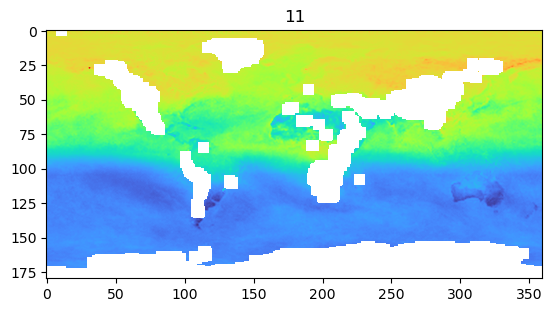

In [9]:
# Animate the dataset across the year (or whatever legth scale of the data one has)
from matplotlib.animation import  PillowWriter
import matplotlib.animation as anim


# for i in range(len(co_path)):
fig = plt.figure()
im = plt.imshow(Dataset(co_path[0]).variables["CO_VMR_A"][1, :, :], interpolation="lanczos", cmap="turbo")
title = plt.title("")

def update(t):
    im.set_array(Dataset(co_path[t]).variables["CO_VMR_A"][1, :, :])
    title.set_text(str(t))        

ani = anim.FuncAnimation(fig, func=update, frames=len(co_path), repeat=False, interval=200)
ani.save("CO anim.mp4", dpi=100)
plt.show()